<a href="https://colab.research.google.com/github/DragnuV/Car-Accident-Detection-using-YOLOV3/blob/master/Car_crash_detectionYOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!/usr/local/cuda/bin/nvcc --version

In [ ]:
!make

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
#!cp /content/darknet /content/drive/My\ Drive/darknet/bin/darknet

In [ ]:
!cp /mydrive/yolov3/obj.zip /content/darknet/data/

In [ ]:
!ls /content/darknet/data/
!unzip /content/darknet/data/obj.zip -d /content/darknet/data/

In [ ]:
!cp /content/drive/My\ Drive/yolov3/yolov3_custom.cfg /content/darknet/cfg


In [ ]:
!cp /content/drive/My\ Drive/yolov3/obj.names /content/darknet/data
!cp /content/drive/My\ Drive/yolov3/obj.data  /content/darknet/data


In [ ]:
!cp /mydrive/yolov3/generate_train.py /content/darknet

In [ ]:
%cd darknet
!ls


!python generate_train.py

In [ ]:
!ls /content/darknet/data/

In [ ]:
#!wget http://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
!cp /mydrive/yolov3/darknet53.conv.74 /content/darknet/

In [ ]:
#!./darknet detector train /content/darknet/data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
#imShow('chart.png')

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /mydrive/yolov3/carfire.mp4 -out_filename /mydrive/yolov3/rnew.avi -thresh 0.5



 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 

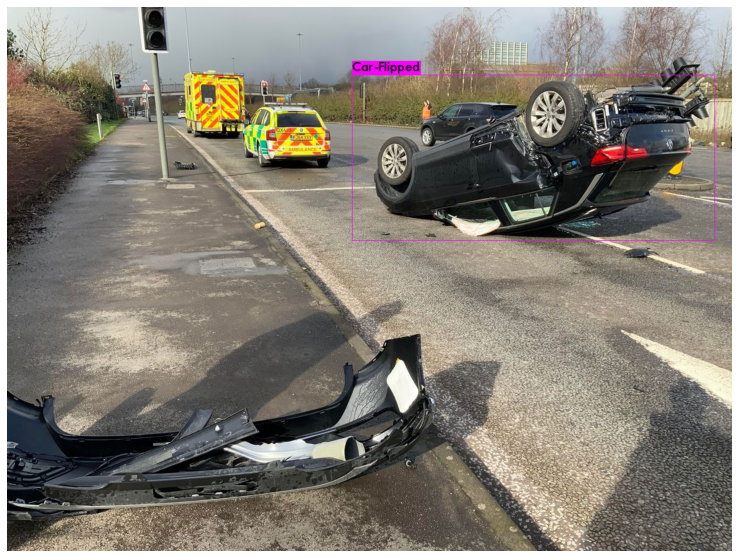

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/yolov3/0_AR_260220_RTCCHAD-1.jpg -thresh 0.3
imShow('predictions.jpg')